In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas import Series, DataFrame
from pylab import *
import seaborn as sns


In [2]:
data = pd.read_csv('ks-projects-201801.csv')

In [3]:
pd.options.display.max_rows = 10

In [4]:
print(data.shape)

(378661, 15)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


In [6]:
data.nunique()

ID                  378661
name                375764
category               159
main_category           15
currency                14
                     ...  
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
Length: 15, dtype: int64

In [7]:
data.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
                    ... 
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
Length: 15, dtype: int64

In [8]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [9]:
data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [10]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [11]:
columns_int = ['name', 'category', 'goal', 'pledged']

In [12]:
col_data = data[columns_int]
col_data.head()

,name,category,goal,pledged
0,The Songs of Adelaide & Abullah,Poetry,1000.0,0.0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,30000.0,2421.0
2,Where is Hank?,Narrative Film,45000.0,220.0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,5000.0,1.0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,19500.0,1283.0


In [13]:
col_data

,name,category,goal,pledged
0,The Songs of Adelaide & Abullah,Poetry,1000.0,0.0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,30000.0,2421.0
2,Where is Hank?,Narrative Film,45000.0,220.0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,5000.0,1.0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,19500.0,1283.0
...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,50000.0,25.0
378657,The Tribe,Narrative Film,1500.0,155.0
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,15000.0,20.0
378659,BioDefense Education Kit,Technology,15000.0,200.0


In [14]:
values_col = [ 'backers', 'usd_pledged_real', 'usd_goal_real']
values_data = data[values_col]
values_data.describe()

,backers,usd_pledged_real,usd_goal_real
count,378661.000000,3.786610e+05,3.786610e+05
mean,105.617476,9.058924e+03,4.545440e+04
std,907.185035,9.097334e+04,1.152950e+06
min,0.000000,0.000000e+00,1.000000e-02
25%,2.000000,3.100000e+01,2.000000e+03
50%,12.000000,6.243300e+02,5.500000e+03
75%,56.000000,4.050000e+03,1.550000e+04
max,219382.000000,2.033899e+07,1.663614e+08


In [15]:
plt.rc('figure', figsize=(15, 8))

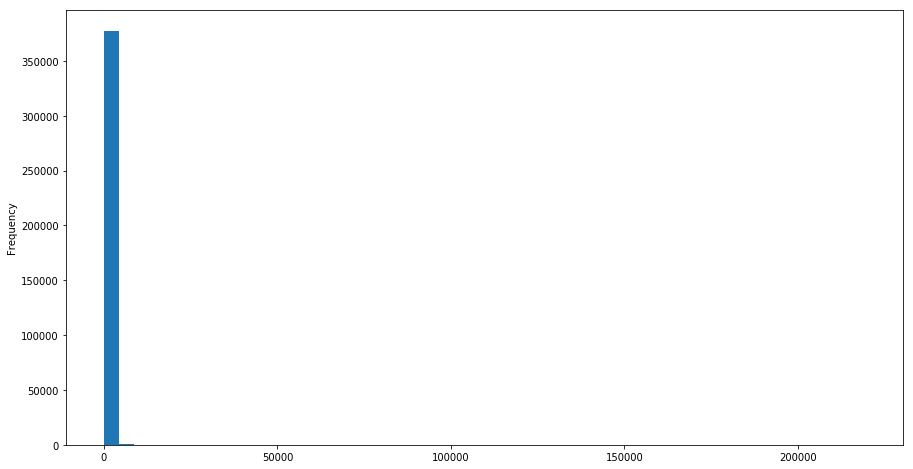

In [16]:
data['backers'].plot.hist(bins=50)
show()

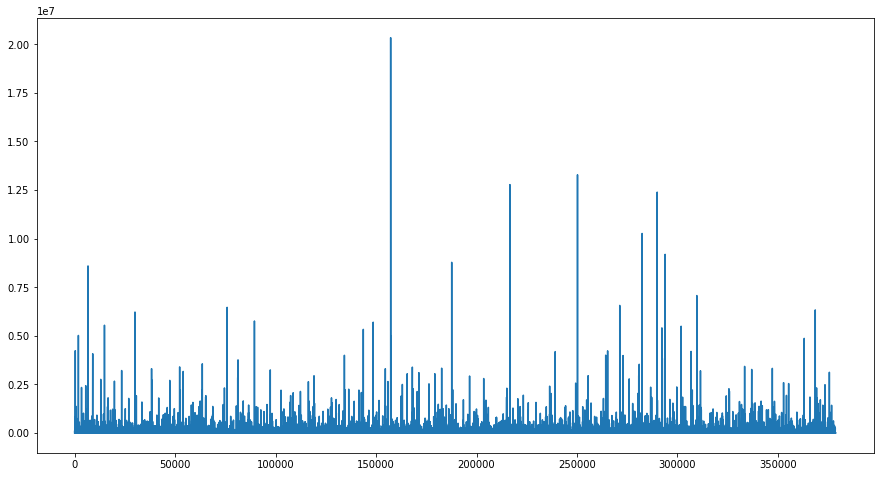

In [17]:
plt.plot(data['usd_pledged_real'])
show()

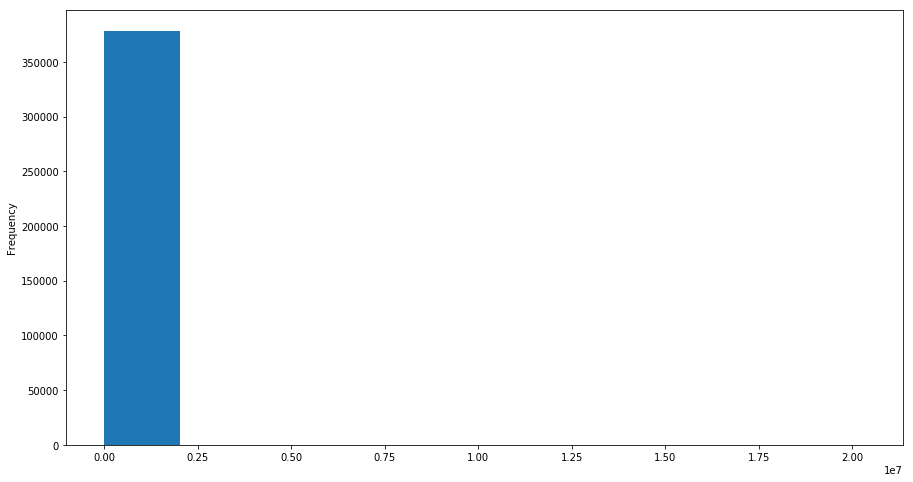

In [18]:
data['usd_pledged_real'].plot.hist(bins=10)
show()

## Value Validation

In [19]:
pd.options.display.max_rows = 20

In [20]:
main_category = data['main_category']
main_category.value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [21]:
pd.options.display.max_rows = 160

In [22]:
category = data['category']
category.value_counts()

Product Design        22314
Documentary           16139
Music                 15727
Tabletop Games        14180
Shorts                12357
Video Games           11830
Food                  11493
Film & Video          10108
Fiction                9169
Fashion                8554
Nonfiction             8318
Art                    8253
Apparel                7166
Theater                7057
Technology             6930
Rock                   6758
Children's Books       6756
Apps                   6345
Publishing             6018
Webseries              5762
Photography            5752
Indie Rock             5657
Narrative Film         5188
Web                    5153
Comics                 4996
Crafts                 4664
Country & Folk         4451
Design                 4199
Hip-Hop                3912
Hardware               3663
Pop                    3350
Painting               3294
Games                  3226
Illustration           3175
Accessories            3165
Public Art          

In [23]:
state = data['state']
state_count = state.value_counts()
state_count

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [24]:
state_per = state_count / len(data)

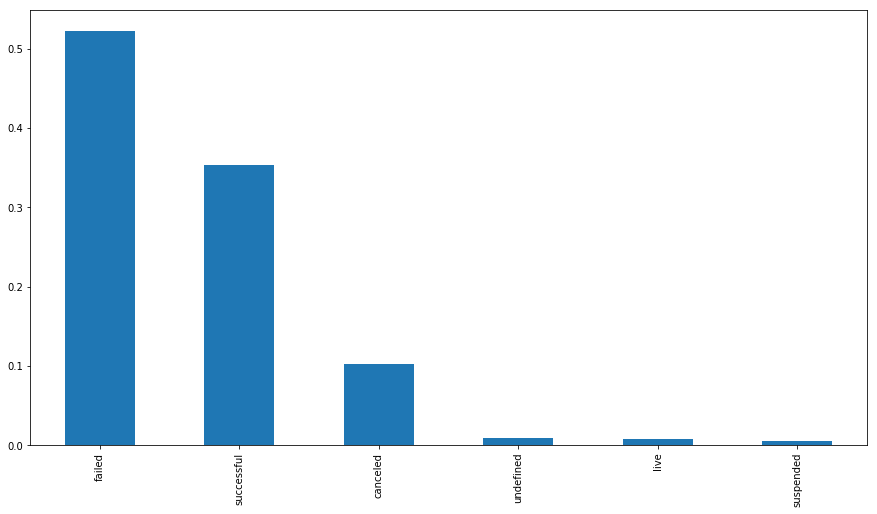

In [25]:
state_per.plot(kind='bar')
show()

In [26]:
pd.options.display.max_rows = 10

In [27]:
s_can = data[data.state == 'canceled']
s_can

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00
68,1000256760,"Raise the Woof, expanding the love (Canceled)",Design,Design,CAD,2015-08-07,15000.0,2015-07-08 21:46:53,700.00,canceled,6,CA,553.32,535.09,11466.14
70,1000260691,Gizbee™ Unlimited Removable Storage for Your T...,Gadgets,Technology,USD,2016-03-25,87000.0,2016-02-29 20:30:27,2030.00,canceled,15,US,2030.00,2030.00,87000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378640,999893629,Ciridian Helix (Canceled),Fiction,Publishing,USD,2014-09-11,1000.0,2014-08-08 21:49:31,100.00,canceled,2,US,100.00,100.00,1000.00
378643,999931480,Google Glass Shield (Canceled),3D Printing,Technology,USD,2014-05-26,6500.0,2014-05-05 20:22:45,0.00,canceled,0,US,0.00,0.00,6500.00
378648,999955533,Cards and Chit Network Season 2! (Canceled),Tabletop Games,Games,USD,2016-02-23,500.0,2016-01-24 16:03:27,121.00,canceled,5,US,121.00,121.00,500.00
378655,999976312,Angela's Poetry (Canceled),Poetry,Publishing,CAD,2014-09-20,5500.0,2014-08-06 03:46:07,0.00,canceled,0,CA,0.00,0.00,4949.60


In [28]:
s_can[data.pledged > data.goal]

C:\Users\Jimena\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
494,1002379225,"The World's First Genuine, Intuitively-control...",Technology,Technology,USD,2017-06-15,5000.0,2017-05-01 18:37:51,61416.0,canceled,103,US,13700.00,61416.00,5000.00
590,1002854072,Spycup turns your iPhone into a hidden camera ...,Gadgets,Technology,CAD,2015-12-19,5000.0,2015-11-19 17:26:34,6672.0,canceled,115,CA,5006.57,4810.38,3604.90
720,1003500859,I Can't Believe It's Not Potato Salad ! (Cance...,Cookbooks,Food,GBP,2014-08-10,10.0,2014-07-11 13:35:05,12.0,canceled,3,GB,20.59,20.03,16.69
764,100372771,A Big Dream of a Little Man - Alex Oddman's De...,Music,Music,USD,2017-01-19,1.0,2016-12-20 22:01:21,7.0,canceled,1,US,7.00,7.00,1.00
1810,1009260867,"Rude Story Cards. An easy, fun & outrageous pa...",Tabletop Games,Games,CAD,2016-10-14,100.0,2016-08-15 19:16:59,121.0,canceled,4,CA,165.99,91.90,75.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375023,981146646,Dollar Bill Origami (Canceled),Art,Art,USD,2015-02-14,20.0,2015-01-15 02:41:13,22.0,canceled,3,US,22.00,22.00,20.00
375028,981182186,Save the Ramzi (Canceled),Music,Music,USD,2009-06-15,1000.0,2009-05-14 22:27:25,1190.0,canceled,18,US,1190.00,1190.00,1000.00
377695,995225156,The World's First Multifunctional Urban Jacket...,Product Design,Design,EUR,2016-08-13,23000.0,2016-06-21 10:03:37,23192.0,canceled,74,IT,26339.01,26267.39,26049.93
378094,997338128,CAPTAINS TABLE: A Pirate Themed Card Game (Can...,Tabletop Games,Games,USD,2015-05-18,165.0,2015-04-10 18:08:19,374.0,canceled,15,US,374.00,374.00,165.00


There are 650 projects which pledged more than goal. Technically they are succesful. It's a 1.7% of the total.

In [29]:
currency = data['currency']
currency_count = currency.value_counts()
currency_count

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
        ...  
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, Length: 14, dtype: int64

In [30]:
country = data['country']
country_count = country.value_counts()
country_count

US    292627
GB     33672
CA     14756
AU      7839
DE      4171
       ...  
BE       617
AT       597
SG       555
LU        62
JP        40
Name: country, Length: 23, dtype: int64

There is a corrupt value for country N,0" with 3797 rows.

In [31]:
x = data.country == 'N,0"'
N0country = data[x]
N0country_curr = N0country['currency']
N0country_curr.unique()

array(['USD', 'AUD', 'CAD', 'GBP', 'EUR', 'SEK', 'DKK', 'NZD', 'NOK', 'CHF'], dtype=object)

There are several currencies for N,0" country values so we cannot deduce which country might be N,0".
We will drop these values.

In [32]:
data = data[data.country != 'N,0"']
data_country = data.country
print(data_country.unique())
data.info()

['GB' 'US' 'CA' 'AU' 'NO' 'IT' 'DE' 'IE' 'MX' 'ES' 'SE' 'FR' 'NL' 'NZ' 'CH'
 'AT' 'DK' 'BE' 'HK' 'LU' 'SG' 'JP']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 374864 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374864 non-null int64
name                374860 non-null object
category            374864 non-null object
main_category       374864 non-null object
currency            374864 non-null object
deadline            374864 non-null object
goal                374864 non-null float64
launched            374864 non-null object
pledged             374864 non-null float64
state               374864 non-null object
backers             374864 non-null int64
country             374864 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    374864 non-null float64
usd_goal_real       374864 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


## Data transformation

In [33]:
data['deadline'] = pd.to_datetime(data.deadline, errors='coerce', dayfirst=False, yearfirst=False, utc=None, box=False, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix')

In [34]:
data['launched'] = pd.to_datetime(data.launched, errors='coerce', dayfirst=False, yearfirst=False, utc=None, box=False, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374864 entries, 0 to 378660
Data columns (total 15 columns):
ID                  374864 non-null int64
name                374860 non-null object
category            374864 non-null object
main_category       374864 non-null object
currency            374864 non-null object
deadline            374864 non-null datetime64[ns]
goal                374864 non-null float64
launched            374864 non-null datetime64[ns]
pledged             374864 non-null float64
state               374864 non-null object
backers             374864 non-null int64
country             374864 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    374864 non-null float64
usd_goal_real       374864 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2), object(6)
memory usage: 45.8+ MB


## Convert currencies with CurrencyConverter library

In [36]:
from currency_converter import CurrencyConverter
c = CurrencyConverter()

In [37]:
c.convert(100, 'EUR', 'USD') #check if works

124.64

In [38]:
from datetime import date # datetime works too
c.convert(100, 'EUR', 'USD', date=date(2014, 3, 21))

137.79999999999998

In [39]:
# define function to convert lists
def convert_list(y):
    con = []
    
    for i in y:
        x = c.convert(i, 'EUR', 'USD')
        con.append(x)
    return con
    

In [40]:
convert_list([100, 50, 1])

[124.64, 62.32, 1.2464]

In [41]:
# filter EUR data and convert to list
data_eur = data[data.currency == 'EUR']
goal_eur_list = data_eur.goal.tolist()

In [42]:
#convert_list(goal_eur_list)

In [43]:
#check with different currencies
array_currencies = data.currency.unique()
list_currencies = array_currencies.tolist()


In [44]:
sup_currencies = c.currencies

In [45]:
for c in list_currencies:
    if c in sup_currencies:
        print( c + ' supported')
    else:
        print('Ups ' + c + ' not supported' )
        

GBP supported
USD supported
CAD supported
AUD supported
NOK supported
EUR supported
MXN supported
SEK supported
NZD supported
CHF supported
DKK supported
HKD supported
SGD supported
JPY supported


In [51]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [56]:
data[['currency','launched', 'deadline', 'goal']]

,currency,launched,deadline,goal
0,GBP,2015-08-11 12:12:28,2015-10-09,1000.0
1,USD,2017-09-02 04:43:57,2017-11-01,30000.0
2,USD,2013-01-12 00:20:50,2013-02-26,45000.0
3,USD,2012-03-17 03:24:11,2012-04-16,5000.0
4,USD,2015-07-04 08:35:03,2015-08-29,19500.0
...,...,...,...,...
378656,USD,2014-09-17 02:35:30,2014-10-17,50000.0
378657,USD,2011-06-22 03:35:14,2011-07-19,1500.0
378658,USD,2010-07-01 19:40:30,2010-08-16,15000.0
378659,USD,2016-01-13 18:13:53,2016-02-13,15000.0


In [46]:
def curr_converter(y):
    con = []
    
    for i in y:
        x = c.convert(i, 'EUR', 'USD')
        con.append(x)
    return con